In [1]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.statistics import A_mat_calc, twiss_calc, \
    normalized_particle_coordinate, amplitude_calc
import numpy as np

import matplotlib.pyplot as plt

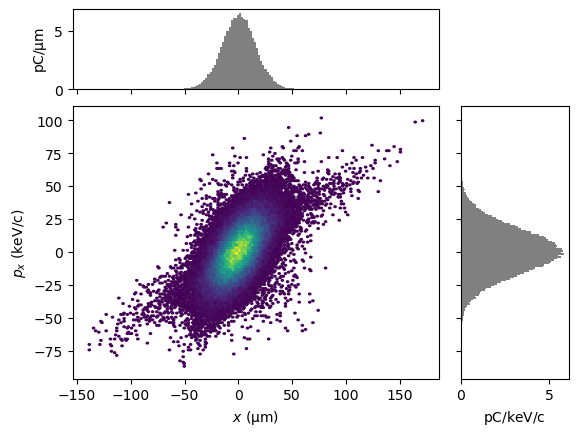

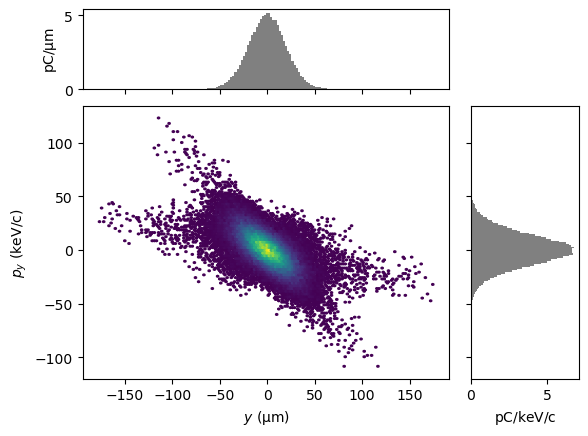

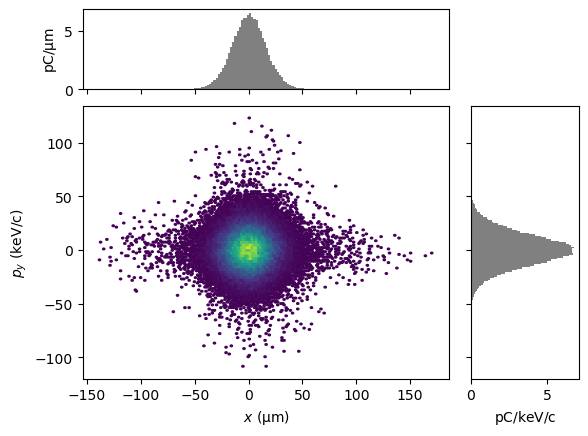

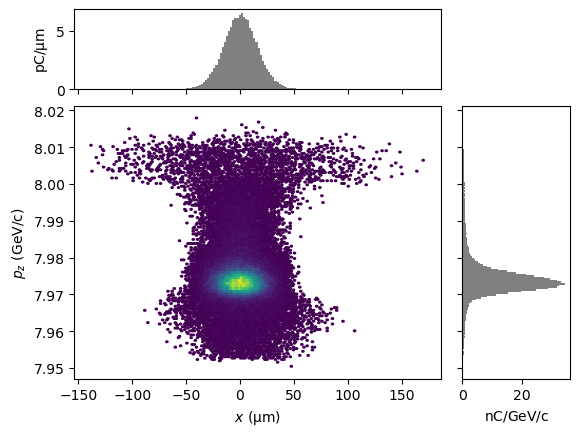

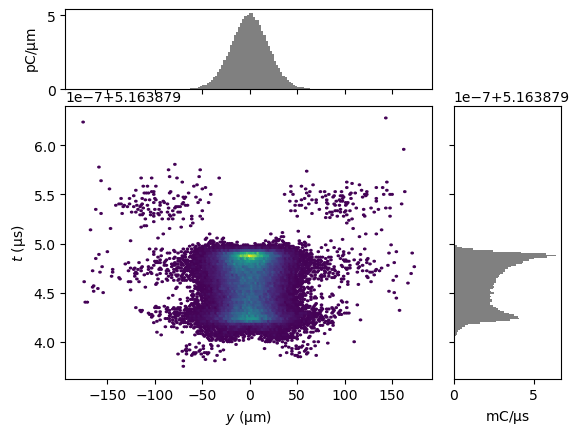

In [2]:
P = ParticleGroup('bmad_particles2.h5')
P.plot('x', 'px')
P.plot('y', 'py')
P.plot('x', 'py')
P.plot('x', 'pz')
P.plot('y', 't')



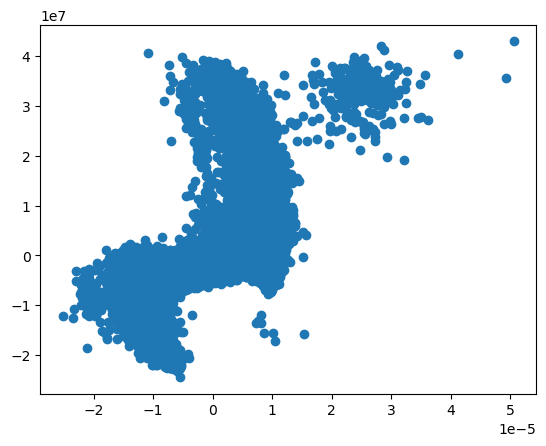

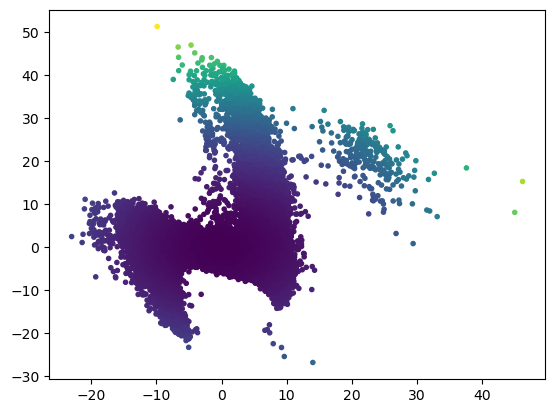

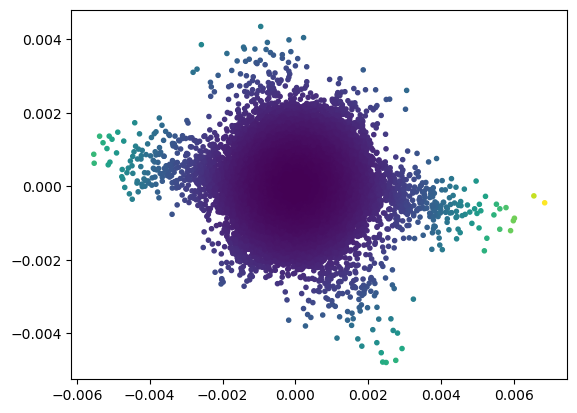

In [3]:
from scipy.constants import c
x = (P.t - P.t.mean())*c
p = P.pz - P.pz.mean()

plt.scatter(x,p)

sigma_mat2 = np.cov(x,p)
ztwiss = twiss_calc(sigma_mat2)

A_inv = A_mat_calc(ztwiss['beta'], ztwiss['alpha'], inverse=True)

norm_t = A_inv[0,0]*x
norm_pz = A_inv[1,0]*x + A_inv[1,1]*p
Jt = amplitude_calc(x, p, beta=ztwiss['beta'], alpha=ztwiss['alpha'])

plt.figure()
plt.scatter(norm_t, norm_pz,c=P.Jz,marker='.')
plt.figure()
plt.scatter(P.x_bar, P.px_bar,c=P.Jx,marker='.')



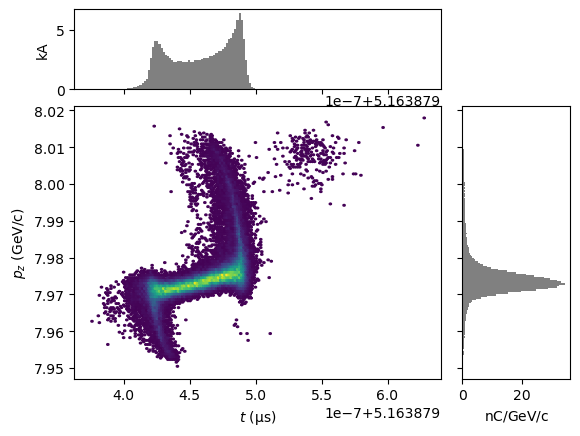

In [4]:
P.plot("t","pz")

0.9999949999874987
(100000,)
[[ 3.05290090e-10  1.93582323e-01  2.14462846e-12  2.17726655e-04
  -3.81717306e-21 -3.94841068e+00]
 [ 1.93582323e-01  3.26525376e+08 -2.44058325e-05  5.28822372e+05
  -1.67138666e-12 -5.36815314e+08]
 [ 2.14462846e-12 -2.44058325e-05  4.71979014e-10 -2.32194362e-01
  -8.59625567e-22 -8.48100951e-01]
 [ 2.17726655e-04  5.28822372e+05 -2.32194362e-01  2.53458534e+08
   6.15117524e-14 -1.73916111e+07]
 [-3.81717306e-21 -1.67138666e-12 -8.59625567e-22  6.15117524e-14
   5.98623545e-28  1.03181796e-07]
 [-3.94841068e+00 -5.36815314e+08 -8.48100951e-01 -1.73916111e+07
   1.03181796e-07  5.53617718e+13]]


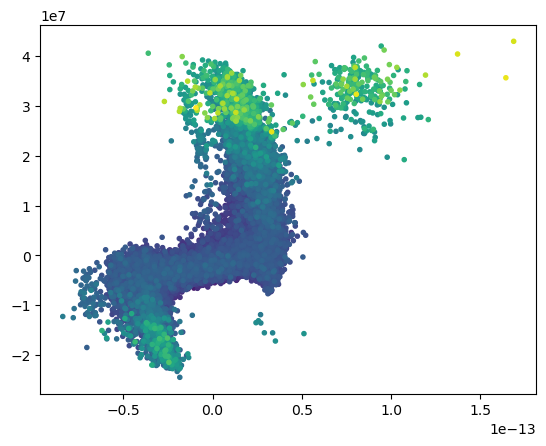

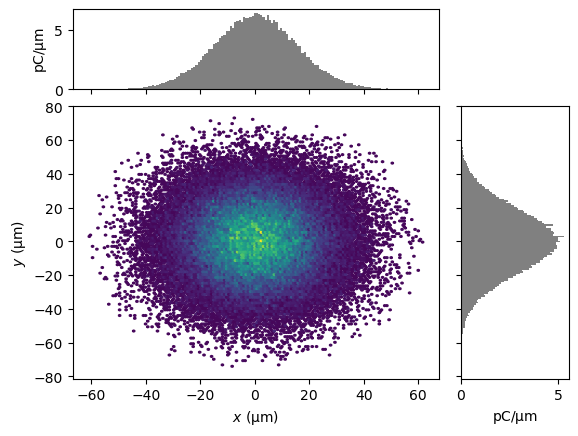

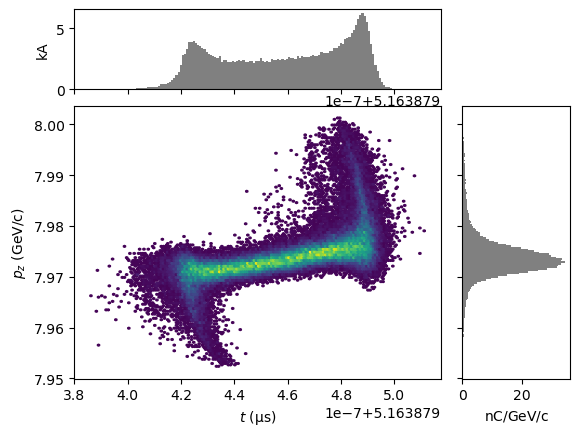

In [17]:
vnames = ["x","px","y","py","t","pz"]
data = np.copy(np.stack([P[name] for name in vnames]).T)
data[:, -2] = data[:, -2] - np.mean(data[:,-2])
data[:, -1] = data[:, -1] - np.mean(data[:,-1])
cov = np.cov(data.T)

t_data = (np.linalg.inv(np.linalg.cholesky(cov)) @ data.T).T

J = np.linalg.norm(t_data, axis=1)
sort_idx = np.argsort(J)
sorted_data = data[sort_idx]
J = J[sort_idx]
P_frac = P[sort_idx][:int(len(P)*0.95)]

plt.scatter(sorted_data[:,-2], sorted_data[:,-1], c=J, marker='.')
P_frac.plot("x","y")
P_frac.plot("t","pz")

print(np.std(t_data[:,-1]))
print(J.shape)
print(cov)

In [ ]:
plt.plot((P.x_bar**2 + P.px_bar**2)/2)
plt.plot((P.y_bar**2 + P.py_bar**2)/2)
plt.plot((P.z_bar**2 + P.pz_bar**2)/2)

#plt.plot(P.Jz)


In [ ]:
core = P[0:int(0.95*len(P))]
cov = core.cov("x","px","y","py","t","pz")
Dinv = np.diag(1 / np.sqrt(np.diag(cov)))
corr = Dinv @ cov @ Dinv
corr

In [ ]:
help(core)